# <center>Spread of Infectious Diseases</center>  
<center><i>Mandatory project #3</i></center>  
<center><b>Armin Hajar Sabri Sabri, Reynel Villabona Gonzalez, Jianing Shi</b></center>  
<center>Date: <b>14 11 2021</b></center>



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import roots
import scipy as sp
import scipy.optimize as opt
from scipy.integrate import odeint
from scipy.optimize import curve_fit


# Abstract

Having given solution to this following project, allowed us to understand how the COVID 19 disease got spread among the population and how the infected people and died people rates grew so fast in each country. Also we found optimal parameters for Beta in order to find the SI-model curve which best describe the original data behaviour, in this project we got beta values using gradient descent for Norway, Sweden and Hubei they were 0.193, 0.0921 and 0.2654, respectively. We calculated same values using Newton's method and they were 0.1938, 0.0929 and 0.2654, respectively. At the end, We constructed a solver for SI-model using adaptive Runge-kutta solver and we saw that it matched the analytical solutions and also the values for beta that we found using new solver created (odeint) wes pretty close to the ones we found in exercise, which could tell us how accurate the solver that we created it was


# Introduction

During the last classes we learnt about how to solve methods like Newton, gradient descedent,  bisection method and runge-kutta, in order to optimize given main functions and try to find their root and finally create our model which descrive main function behaviour.


We were set out a problem which we will solve in the following steps and it is to estimate try to create a function which describe the data behaviour given some empirical equations, and after that we create different solver using optimization methods in order to make the calculation easier and faster.

In the first part we learnt how to import data and display it according to the country we desired to see the data, by creating different solvers that simplify our job, as we just set a country a name and it did the analyze of the analytical and experimental data. This process was done for Norway, Hubei an sweden and for both cases confirmed and death.

In the second part we were asked to find Beta values that makes SI-Model to fit better the analytical data, by doing a senstivity analysis of beta using the sum of squared residuals. Basically what we did was create to solvers in order to get the Sum of squared residuals and its derivate, when derivate of SSR is close to zero is where the optimal value for Beta is. We were able to find beta values by plotting the SSR and its derivate and visualizing but also we did it by using Bisection Method, Gradient descent and Newton method, in all of these methods we observed that we got quite close results, which tell us that and confirmed about this Beta value that we were looking for.


In the third part we include in our SI-model compartments like E -Number of exposed people-, R -Number of recovered individuals- and D - Number of dead people-; and we created a new solver for this model which was called SEIRD, we used Runge-kutta 4th order to solve this model and we compared it graphycally against the analytical solution and solver fit pretty good.


In the last part we fit SEIRD-model to the data by using ODEINT function from the scipy.integrate library,we plotted the result from this solver and compared it aginst the one we develop in third part and they matched really good.As a better comparison for this we use curve_fit function to find optimal parameters for B from the SEIRD model and we compared these results against the ones gotten at exercise 2 at they are almost the same, difference is not more than some hundredths.



# Exercise 1: Is the model any good?



## Part 1

To increase readability and reusability of code, it is important to break it into smaller pieces. For example, it is almost always a good idea to separate the reading and (pre)processing of data from plotting, and further from model calculations.
 - Make a Python function that a) extracts Corona data for a specific location and b) returns the results in the form of a Pandas dataframe.
 - Make one or several functions that takes as input the dataframe for a specific location, and makes a plot showing the number of confirmed cases and/or deaths of COVID-19. Allow for the possibility of including predictions of the analytical SI-model in the same figure.

In [2]:
d=pd.read_csv('./data/corona_data.dat', sep='\t')
d

,LOCATION,TIME,ELAPSED_TIME_SINCE_OUTBREAK,NEW_CONFIRMED,CONFIRMED,NEW_DEATHS,DEATHS,RECOVERED
0,Afghanistan,2020-02-24 23:59:00,0,5,5,0,0,0
1,Afghanistan,2020-02-25 23:59:00,1,0,5,0,0,0
2,Afghanistan,2020-02-26 23:59:00,2,0,5,0,0,0
3,Afghanistan,2020-02-27 23:59:00,3,0,5,0,0,0
4,Afghanistan,2020-02-28 23:59:00,4,0,5,0,0,0
...,...,...,...,...,...,...,...,...
112429,Hubei,2021-10-08 23:59:00,625,0,68299,0,4512,0
112430,Hubei,2021-10-09 23:59:00,626,0,68299,0,4512,0
112431,Hubei,2021-10-10 23:59:00,627,0,68299,0,4512,0
112432,Hubei,2021-10-11 23:59:00,628,0,68299,0,4512,0


**Solution**:

In [3]:
def extract_corona_data(location, data_file='./data/corona_data.dat'):
    
    covid19_df = pd.read_csv(data_file, sep='\t') # Extracting the Corona Data 
    
    try:
        covid19_df = covid19_df[covid19_df['LOCATION'] == location] # data for specific location
    except:
        print(f'There is no such location {location}...') # return none if input location does not exist
        return None
    return covid19_df # returning Pandas dataframe


In [4]:
def analytical_SI( S0, I0, beta):


    t = np.linspace(0, 200, 201)

    # Calculate S(t) and I(t) 
    i_t = (1/(1+((S0/I0)*np.exp(-beta*t))))
    s_t= (((S0/I0)*np.exp(-beta*t))/(1+((S0/I0)*np.exp(-beta*t))))
    

    # Add modelled I(t) to the same figure
    fig, ax = plt.subplots()
    #ax.set_title('An vs dat')
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Cases')
    ax.scatter(t, i_t, color='red')
    return fig

In [5]:
def plot_confirmed_cases(beta,location, data_file='./data/corona_data.dat'):
 
    covid19_df = extract_corona_data(location, data_file)
    N = covid19_df['CONFIRMED'].iloc[-1]

# getting corona data

    time= covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].iloc[0:200]
    confirmed=covid19_df['CONFIRMED'].iloc[0:200]/N
    
    #time =covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].to_numpy()# retrieving time from outbreak
    #confirmed = covid19_df['CONFIRMED'].to_numpy()/N # retrieving confirmed cases
    
    
    fig = analytical_SI(N-1, 1, beta)
    # Make plot
    ax = fig.axes[0]
    ax.plot(time, confirmed)
    ax.legend(['Experminetal Data','Analytical'])
    #ax.legend(location)
    return fig

In [6]:
def plot_deaths_cases(location, data_file='./data/corona_data.dat'):
    
    # Getting data
    covid19_df = extract_corona_data(location, data_file)
    N = covid19_df['CONFIRMED'].iloc[-1]
    


    time = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK']# retrieving time from outbreak
    deaths = covid19_df['DEATHS'] # retrieving confirmed cases
    

    # Make plot
    fig, ax = plt.subplots()
    ax.set_title(location)
    ax.grid()
    ax.set_xlabel('Time since initial outbreak (days)')
    ax.set_ylabel('Number of deaths cases')
    ax.scatter(time, deaths, color='blue')
    ax.legend([location])
    return fig

## Part 2

- Choose four specific locations (e.g. Hubei, Norway, Sweden etc.). Use the functions you just made to plot the cumulative number of confirmed cases of COVID-19 versus time.


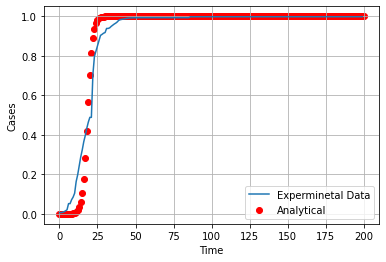

In [7]:
Confrimed_caes_Hubei= plot_confirmed_cases(0.6,'Hubei')

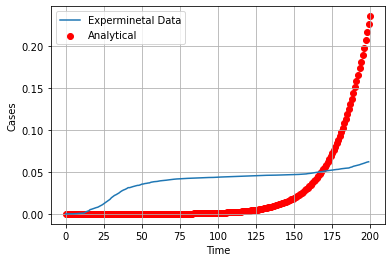

In [8]:
Confrimed_caes_Norway=plot_confirmed_cases(0.055,'Norway')

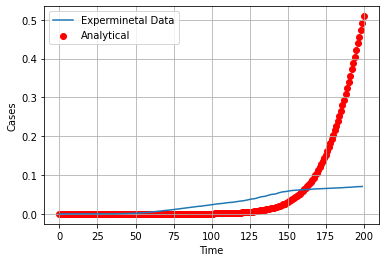

In [9]:
Confrimed_caes_Sweden=plot_confirmed_cases(0.07,'Sweden')

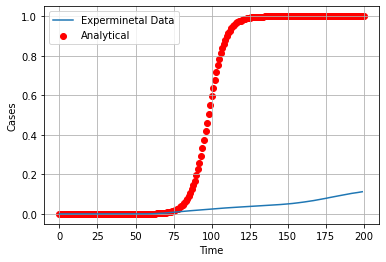

In [10]:
Confrimed_caes_Afghanistan=plot_confirmed_cases(0.18,'US')


## Part 3

- Make another figure showing the cumulative number of deaths (for the same locations).


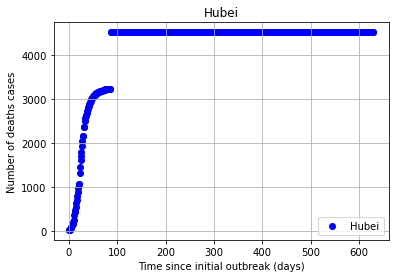

In [11]:
deaths_cases_Hubei = plot_deaths_cases('Hubei')

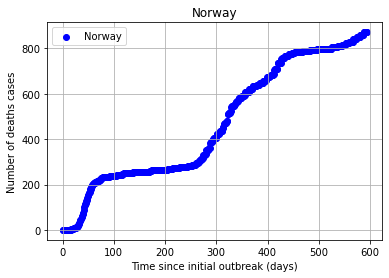

In [12]:
deaths_cases_Norway = plot_deaths_cases('Norway')

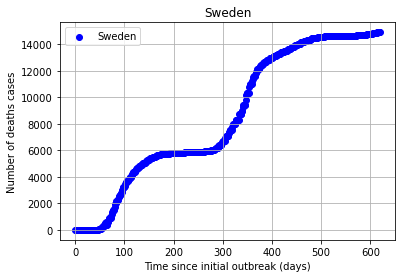

In [13]:
deaths_cases_Sweden = plot_deaths_cases('Sweden')

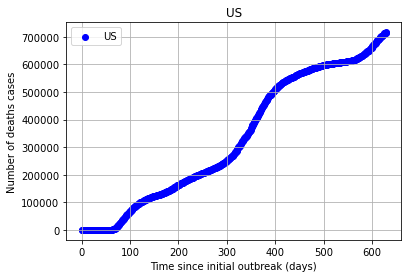

In [14]:
deaths_cases_Afghanistan = plot_deaths_cases('US')

## Part 4
- Can the the simple SI-model explain the observations you plotted in parts 2 and 3? If the answer is yes, can you think of other situations in which it cannot? If no, why not?



> Yes, but in the begining or middel of the epidemic. The simple SI-model is generally used to simulate cases between susceptible and infected. However, studies have shown that COVID-19 is a disease that can be recovered and repeatedly infected, such as the flu. At the same time, vaccines and social restrictions will also hinder the spread of the disease.Therefore, more complex models such as SIS, SIR-model should be used to simulate.




# Exercise 2

We want to choose a value for $\beta$ such that the SI-model comes close to the data. Finding "optimal" parameter values will in the following be based on the method of least squares. Specifically, the objective function we want to minimize is the sum of squared residuals,  
$${\rm SSR}=\sum_{i=0}^{N_{d}-1} r_i^2=\sum_{i=0}^{N_{d}-1} (d_i-m_i)^2\tag{1}$$  
where $N_d$ is the number of data points, $d_i$ is the $i$-th data point, and $m_i$ is the corresponding model prediction. For the $SI$-model, we are only going to compare with the cumulative number of reported cases of COVID-19, and we let $m_i = i(t_i; \beta)$. The optimal parameter value for $\beta$ can then be found where the least square estimate (objective function) has the minimum value, this is equivalent to stating that the derivative of the least square estimate should be zero.  
The derivative of the objective function is  
$$\frac{d{\rm SSR}}{d\beta}=2\sum_{i=0}^{N-1} r_i\frac{dr_i}{d\beta}=-2\sum_{i=0}^{N-1} (d_i-i(t_i; \beta))\frac{di(t; \beta)}{d\beta}\tag{2}$$  
where the derivative of $i(t; \beta)$ with respect to $\beta$ can be found from equation (7):  
$$\frac{di(t; \beta)}{d\beta}=\frac{\frac{s_0}{i_0}te^{-\beta t}}{({1+\frac{s_0}{i_0}e^{-\beta t}})^2}\tag{3}$$  
The scaled SI-model.  
$$\dot{s}(t)=-\beta(t)\cdot s(t)\cdot i(t)\tag{4}$$  
$$\dot{i}(t)=\beta(t)\cdot s(t)\cdot i(t)\tag{5}$$  
Here we have introduced the short-hand notation $\dot{f}=\frac{\rm df(t)}{\rm dt}$.  
If $\beta(t) = \beta$ is constant, the analytical solution to the $SI$-model is  
$$s(t)=\frac{\frac{s_0}{i_0}e^{-\beta t}}{1+\frac{s_0}{i_0}e^{-\beta t}},\tag{6}$$  
$$i(t)=\frac{1}{1+\frac{s_0}{i_0}e^{-\beta t}},\tag{7}$$  
where $i_0 = i(0) = I(0)/N$, and $s_0 = s(0) = S(0)/N$.  



## Part 1

Write two Python functions, one that calculates SSR for a given location,
and another that calculates the derivative of SSR for a given location.

In [192]:
def SSR(beta, location, t_max=200, data_file='./data/corona_data.dat'):

    covid19_df = extract_corona_data(location,data_file)
    t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
    confirmed_Cases = covid19_df['CONFIRMED'].values
    
    # Discard all data points after t=t_max
    include_time = (t_data <= t_max)
    t_data = t_data[include_time]
    confirmed_Cases = confirmed_Cases[include_time]
    
    N = confirmed_Cases[-1]
    I0 = 1.0/N
    S0 = 1.0 - I0
    #print(S0, I0, S0/I0, np.exp(-beta*t_data))
    
    m_i = 1.0 / (1.0 + (S0/I0)*np.exp(-beta*t_data))
    return np.sum((confirmed_Cases/N-m_i)**2)

In [16]:
def df_SSR(beta, location, t_max=200, data_file='./data/corona_data.dat'):
    
    covid19_df = extract_corona_data(location,data_file)
    t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
    confirmed_Cases = covid19_df['CONFIRMED'].values
    
    # Discard all data points after t=t_max
    include_time = (t_data <= t_max)
    t_data = t_data[include_time]
    confirmed_Cases = confirmed_Cases[include_time]

    N = confirmed_Cases[-1]
    I0 = 1.0/N
    S0 = 1.0 - I0
    
    m_i = 1/(1+((S0/I0)*np.exp(-beta*t_data)))
    
    df_m_i= S0/I0*t_data*np.exp(-beta*t_data)/(1+(S0/I0)*np.exp(-beta*t_data))**2
    return -2*np.sum((confirmed_Cases/N-m_i)*df_m_i)

## Part 2  Choose a few different locations.

- For each location, use the functions you just made to plot both SSR and its derivative as a function of β (in the same figure).



In [17]:
def plot_SSR(beta_array, location, data_file='./data/corona_data.dat'):
    
    SSR_array = [SSR(beta, location,t_max=50) for beta in beta_array]



    fig, ax = plt.subplots()
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel('SSR')
    ax.set_title(location)

    ax.plot(beta_array, SSR_array)
    ax.grid()
    ax.legend(['SSR','Dervative of SSR'])

    return fig

In [18]:
def plot_df_SSR(beta_array, location, data_file='./data/corona_data.dat'):
    
    df_SSR_array = [df_SSR(beta, location,t_max=50) for beta in beta_array]
    
    
    fig, ax = plt.subplots()

    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel('Df SSR')
    ax.set_title(location)
    ax.plot(beta_array, df_SSR_array,color='red')
    ax.grid()
    ax.legend(['Dervative of SSR'])

    return fig

In [19]:
#beta_array = np.linspace(0.01, 0.7, 51)
#SSR_array = [SSR(beta, 'Norway', t_max=50) for beta in beta_array]
#df_SSR_array = [df_SSR(beta, 'Norway', t_max=50) for beta in beta_array]
#plot_df_SSR(beta_array,'Norway')

In [20]:
 def plot_SSR_dfSSR(beta_array, SSR_array, df_SSR_array,location,ylabel='SSR'):
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(ylabel)
    ax.plot(beta_array, SSR_array, label='SSR')
    ax2 = ax.twinx()
    ax2.plot(beta_array, df_SSR_array, label='Derivative of SSR', color='red')
    ax2.set_ylabel('y-axis in DF SSR')
    ax.legend(loc='best')
    ax2.legend(loc='best')
    ax2.set_title(location)
    ax.grid()
    


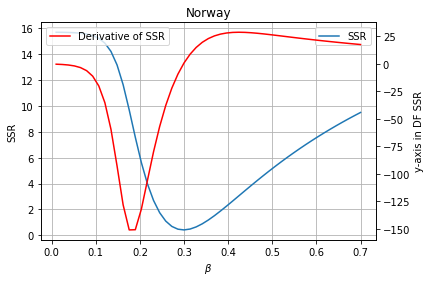

In [21]:
# Norway
beta_array = np.linspace(0.01, 0.7, 51)
SSR_array = [SSR(beta, 'Norway', t_max=50) for beta in beta_array]
df_SSR_array = [df_SSR(beta, 'Norway', t_max=50) for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'Norway')

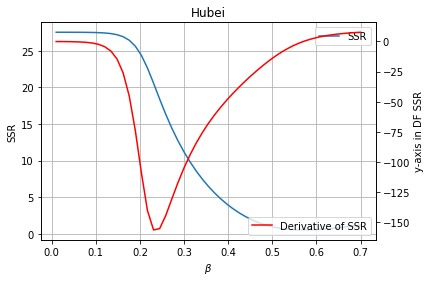

In [22]:
#Hubei
beta_array = np.linspace(0.01, 0.7, 51)
SSR_array = [SSR(beta, 'Hubei', t_max=50) for beta in beta_array]
df_SSR_array = [df_SSR(beta, 'Hubei', t_max=50) for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'Hubei')

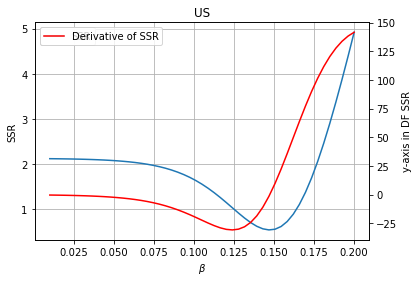

In [23]:
# Afghanistan
beta_array = np.linspace(0.01, 0.2, 51)
SSR_array = [SSR(beta, 'US', t_max=50) for beta in beta_array]
df_SSR_array = [df_SSR(beta, 'US', t_max=50) for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'US')

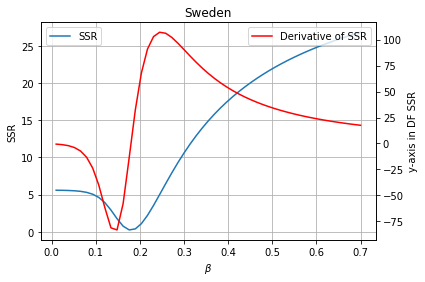

In [24]:
#Sweden
beta_array = np.linspace(0.01, 0.7, 51)
SSR_array = [SSR(beta, 'Sweden', t_max=50) for beta in beta_array]
df_SSR_array = [df_SSR(beta, 'Sweden', t_max=50) for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'Sweden')

- What do you observe regarding the shape of the functions? Tip: It might be a good idea to exclude some of the data points.

> According to SSR, the smaller the residual sum of squares, the better your model fits your data. A value of zero means your model is a perfect fit. It is quite easy to find the lowest point and corresponding $\beta$ in the graphs above.

## Part 3

In the course we have covered several algorithms that are useful for finding roots and/or minima of functions, e.g., fixed point iteration, Newton’s Raphson’s method, the bisection method, the secant method, and gradient descent.

- Implement at (least) one of the methods listed above, and use it to find the β-value that minimizes SSR. Do this for each of the locations you chose in Part 2.


In [25]:
#Bisection method
def bisection(fun, min_x=0, max_x=1, n_step=1000, max_lter=64, location="Norway", plot=False, print_log=False):
    """
    :param fun: function
    :param min_x: The lower limit
    :param max_x: The upper limit
    :param n_step: The number of steps to find the solution, interval length/step length
    :param location: Location
    :param max_lter: The maximum number of iterations
    :param plot:True draws a curve graph, False does not draw a curve
    :param print_log: True outputs solution information, False does not output solution information
    :return: numpy.array()solution set
    """
    x_list = np.linspace(min_x, max_x, n_step)
    y_list = np.zeros(n_step)
    solve_list = []
    N_solve=0
    for i in range(n_step):
        y_list[i] = fun(x_list[i],location)
        if  0 < i and y_list[i] * y_list[i - 1] <= 0:
            N_solve+= 1
            max_val = x_list[i]
            min_val = x_list[i - 1]
            temp1_x = (max_val - min_val) / 2 + min_val
            temp2_x = min_val
            error_ = abs((max_val - min_val) / (abs(temp1_x) + 1e-10))
            lter_n = 0
            if print_log:
                print("Found the %d th solution in(%11.4E, %11.4E)，Enter the iteration...\n"
                      "     Times      Relative error             x                 fun" % (N_solve, min_val, max_val))

            while lter_n < max_lter and error_ > 1e-6:
                lter_n += 1
                temp1_y = fun(temp1_x,location)
                if print_log:
                    print(" %8d   %16.4E    %16.4E   %16.4E" % (lter_n, error_, temp1_x, temp1_y))
                if y_list[i] > y_list[i - 1]:  # increase
                    if temp1_y > 0:
                        max_val = temp1_x
                    else:
                        min_val = temp1_x
                if y_list[i] < y_list[i - 1]:  # decrease
                    if temp1_y > 0:
                        min_val = temp1_x
                    else:
                        max_val = temp1_x
                temp1_x = (max_val - min_val) / 2 + min_val
                error_ = abs((temp1_x - temp2_x) / (abs(temp1_x) + 1e-10))
                temp2_x = temp1_x
            if lter_n < max_lter:
                solve_list.append(temp1_x)
                if plot:
                    plt.plot(temp1_x, temp1_y, marker=".", markersize=16, color="r")
            else:
                print("Reach the maximum number of iterations, relative error %16.4E" % error_)
    if plot:
        plt.plot(x_list, y_list, color="b")
        plt.title(location)
        plt.show()
    return np.array(solve_list)

Found the 1 th solution in( 1.9319E-01,  1.9419E-01)，Enter the iteration...
     Times      Relative error             x                 fun
        1         5.1680E-03          1.9369E-01        -1.7935E-01
        2         3.8710E-03          1.9394E-01         4.7652E-02
        3         6.4558E-04          1.9382E-01        -6.5711E-02
        4         3.2268E-04          1.9388E-01        -8.9954E-03
        5         1.6132E-04          1.9391E-01         1.9337E-02
        6         8.0665E-05          1.9390E-01         5.1728E-03
        7         4.0334E-05          1.9389E-01        -1.9107E-03
        8         2.0167E-05          1.9389E-01         1.6312E-03
        9         1.0083E-05          1.9389E-01        -1.3975E-04
       10         5.0417E-06          1.9389E-01         7.4572E-04
       11         2.5208E-06          1.9389E-01         3.0299E-04
       12         1.2604E-06          1.9389E-01         8.1617E-05


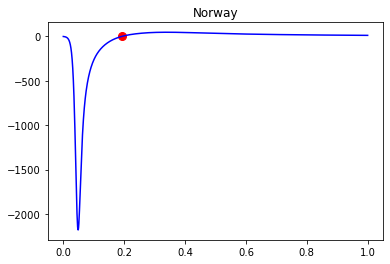

β (Norway)= [0.19389128]
Found the 1 th solution in( 9.2092E-02,  9.3093E-02)，Enter the iteration...
     Times      Relative error             x                 fun
        1         1.0811E-02          9.2593E-02        -1.3194E+01
        2         8.0863E-03          9.2843E-02        -4.8832E+00
        3         1.3459E-03          9.2968E-02        -7.8112E-01
        4         6.7249E-04          9.3031E-02         1.2566E+00
        5         3.3636E-04          9.2999E-02         2.3884E-01
        6         1.6821E-04          9.2984E-02        -2.7087E-01
        7         8.4097E-05          9.2991E-02        -1.5945E-02
        8         4.2047E-05          9.2995E-02         1.1146E-01
        9         2.1024E-05          9.2993E-02         4.7764E-02
       10         1.0512E-05          9.2992E-02         1.5911E-02
       11         5.2560E-06          9.2992E-02        -1.6795E-05
       12         2.6280E-06          9.2992E-02         7.9470E-03
       13         

KeyboardInterrupt: 

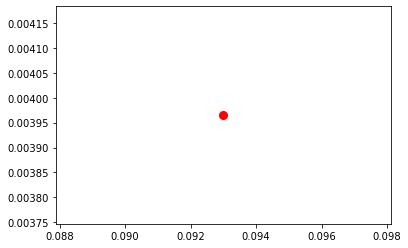

In [138]:
print(chr(946),"(Norway)=",bisection(fun=df_SSR, min_x=0, max_x=1, location="Norway",print_log= True, plot= True))
print(chr(946),"(Sweden)=",bisection(fun=df_SSR, min_x=0, max_x=1, location="Sweden",print_log= True, plot= True))
print(chr(946),"(Hubei)=",bisection(fun=df_SSR, min_x=0, max_x=1, location="Hubei",print_log= True, plot= True))
print(chr(946),"(US)=",bisection(fun=df_SSR, min_x=0, max_x=1, location="US",print_log= True, plot= True))

In [ ]:
def gradient_descent(beta, g=.001, prec=1e-8,MAXIT=500,location='Norway'):  
 
    beta_old = beta
    for n in range(MAXIT):  
        beta_new = beta_old - g*df_SSR(beta_old,location)   
        temp=abs(SSR(beta_new,location)-SSR(beta_old,location))
        if(temp < prec):      
            print('Found solution:', beta_new,', after:', n, 'iterations.' )      
            return beta_new       
        beta_old=beta_new  
    print('Max number of iterations: ', MAXIT, ' reached.')    
    print('Returning best guess, value of function is: ', SSR(beta_new,location))   
    return beta_new

In [46]:
print(chr(946),"(Norway)=",gradient_descent(0.05,location='Norway'))
print(chr(946),"(Sweden)=",gradient_descent(0.05,g=.000001,prec=1e-3,MAXIT=5000,location='Sweden'))
print(chr(946),"(Hubei)=",gradient_descent(0.05,location='Hubei'))

Found solution: 0.1938914179609431 , after: 359 iterations.
β (Norway)= 0.1938914179609431
Found solution: 0.09210437173903116 , after: 90 iterations.
β (Sweden)= 0.09210437173903116
Found solution: 0.5689961955772527 , after: 205 iterations.
β (Hubei)= 0.5689961955772527


In [54]:
#Newton’s method
def derivative(x,locaion):
    return (df_SSR(x+0.000005,locaion)-df_SSR(x-0.000005,locaion))/0.00001

def Newton(x0,locaion):
    """
    :param x: Predictive value of beta when dSSR=0
    :param location: Location
    :return: float beta
    """
    x1 = x0 - df_SSR(x0,locaion) / derivative(x0,locaion)
    while abs(x0-x1) > 0.00000001:
        x0 = x1
        x1 = x0 - df_SSR(x0,locaion) / derivative(x0,locaion)
    return x1

In [55]:
print(chr(946),"(Norway)=",Newton(0.19,"Norway"))
print(chr(946),"(Sweden)=",Newton(0.09,"Sweden"))
print(chr(946),"(Hubei)=",Newton(0.2,"Hubei"))

β (Norway)= 0.19389131106353177
β (Sweden)= 0.09299191821434702
β (Hubei)= 0.5689770190003091


- Can you always expect to find an optimal β-value with your chosen algo- rithm(s)? Why / why not?

>According to the 3 algorithms above, all of them (Newton’s method, gradient descent method and bisection method)  can find an optimal $\beta$-value. But for gradient descent method we must take very care of the learning step when the $\beta$-value is very closed to 0, as $\beta$-Sweden 0.09. The learning step ($g$) should be so tiny so possible. If new $\beta$ (beta_new = beta_old - g*df_SSR(beta_old,location)) is less than 0, the algorithm will jump out. Meanwhile, we should reduce the precision so that the simulation will be too long. But on the other hand, when $\beta$-value is not very closed to the zero, we should enlarge learning step in order to accerlate the the algorithm.

# Exercie 3

* In this exercise you will do two things. First, you are going to implement an adaptive Runge-Kutta solver for an arbitrary system of ODEs of the form  
$$\frac{\rm dy}{\rm dt}= f(y, t)\tag{8}$$  
where the solution y may be a vector. Since the equation system is completely generic, the solver has to take in as $\it {argument}$ the function that computes the right hand side-vector; that is, you are not allowed to hard-code in a specific model. In addition, the solver needs to know the starting time, $t_0$, the corresponding initial condition(s) $f(y, t)$, as well as the final simulation time, $t_f$.  
In the second part you are going to test the solver on the particular case of the SI-model, equations (4) and (5). This is useful, because we know the analytical solution and can therefore check the accuracy of our solver implementation.

## part1

* Implement the Adaptive Runge-Kutta method for a general ODE system. Use Runge-Kutta fourth order and Richardson extrapolation to choose time steps.

In [107]:
def rk4_step(func,y,t,dt, **kwargs):
    k1=dt*func(y,t, **kwargs)
    k2=dt*func(y+0.5*k1,t+0.5*dt, **kwargs)
    k3=dt*func(y+0.5*k2,t+0.5*dt, **kwargs)
    k4=dt*func(y+k3,t+dt, **kwargs)
    return (k1+2*k2+2*k3+k4)/6

def rk2_step(func, y, t, dt):
    """
    t : time
    dt : step size (dt=h)
    func : the right hand side of the ode
    Integrates from time t to t+h using RK2 func = right hand side of ODE
    y = solution vector
    t = current time
    h = step size

    """ 
    k1 = dt*func(y,t)
    k2 = dt*func(y + (1/2)*k, t + dt*(1/2))
    return k2

In [108]:
def rk_adpative(func,y0,t0,tf,rel_tol=1e-5,abs_tol=1e-5,p=4):
    y=[]
    t=[]
    ti=t0
    y.append(y0)
    t.append(ti)
    dt=1e-2 # start with a small step 
    cnt = 0
    while(ti<=tf):
        y_old=y[-1]
        #EPS=np.abs(y_old)*rel_tol+abs_tol 
        EPS=np.linalg.norm(y_old)*rel_tol+abs_tol
        eps=10*EPS
        while(eps>EPS): # continue while loop until correct dt
            DT=dt
            # one large step from t to t+dt
            y_new =  y_old + rk4_step(func, y_old,ti,DT)
            # and two small steps - from t -> t+dt/2
            y1    =  y_old + rk4_step(func, y_old,ti,DT*0.5)
            # and from t+dt/2 to t + dt
            
            y2    =  y1 + rk4_step(func,y1,ti+0.5*DT,DT*0.5) 
            #eps   =  np.abs(y2-y_new)/(2**p-1)  # estimate numerical error
            eps = np.linalg.norm(y2-y_new)/(2**p-1)
            dt    =  0.9*DT*(EPS/eps)**(1/(p+1))  # calculate new time step
            cnt = cnt + 1
        y.append((2**p*y2-y_new)/(2**p-1))
        ti=ti+DT 
        t.append(ti)
    return np.array(t),np.array(y) 

## part 2

* Simulate a scenario with the SEIRD-model using both your solver and
odeint. Show that the output from the solvers agree 

In [109]:
def It_analytical(t_array,S0=0.99,I0=0.01,beta=0.06):
    return 1/(1+((S0/I0)*np.exp(-beta*t_array)))


In [110]:
def St_analytical (t_array,S0=0.99,I0=0.01,beta=0.06):
    return (S0/I0)*np.exp(-beta*t_array)/(1+((S0/I0)*np.exp(-beta*t_array)))

In [111]:
y_initial=[0.99,0.01]

def SI_model(y_initial,t_array,beta=0.06):
    s,i = y_initial
    return np.array([-beta*s*i,beta*s*i])

* Compare the output of your solver with the analytical solution, equations
(4) and (5).  

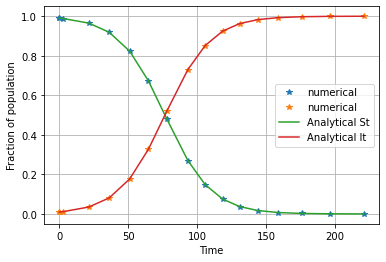

In [112]:
t_array,y_array= rk_adpative(SI_model,y_initial,0,200)

plt.plot(t_array,y_array,'*',label='numerical')
plt.plot(t_array,St_analytical(t_array),label='Analytical St')
plt.plot(t_array,It_analytical(t_array),label='Analytical It')
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.grid()
plt.legend()

* Does the numerical solver reproduce the analytical result at $t = t_f$ within the expected numerical accuracy?

> From the graph above, we can see that the analytical result matches the expected numerical accuracy point very well.

## part 3

* Apply your ODE-solver to the SEIRD-model. Use the same value for $\beta$ as in the previous part, and the same $t_0$ and $t_f$ . For the other model parameters, use the suggested values listed in the table above.

In [194]:
def SEIR_model(y_seir_initial,t, beta=0.06, tau_inc=5., tau_sick=21, fd=0.02): #RHS
    #s=y_seir_inital[0]
    #e=y_seir_inital[1]
    #i=y_seir_inital[2]
    #r=y_seir_inital[3]
    #d=y_seir_inital[4]
    s,e,i,r,d = y_seir_initial
    return np.array([-beta*i*s, 
                     beta*i*s - e/tau_inc,
                     e/tau_inc - i/tau_sick,
                     (1-fd)*i/tau_sick,
                     fd*i/tau_sick])

* Based on the output from your ODE-solver, use equation $C(t) = I(t) + R(t) + D(t)$ to plot the cumulative number of cases of COVID-19. In the same plot, include $I(t)$ from the previous part.

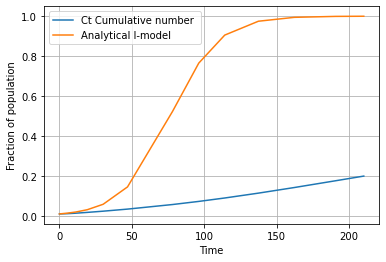

In [193]:
y_seir_initial=[0.99, 0,0.01, 0, 0]
t,y= rk_adpative(SEIR_model,y_seir_initial,0,200)

c_t= y[:,2] + y[:,3]+y[:,4]

plt.plot(t,c_t,label= 'Ct Cumulative number ')


plt.plot(t,It_analytical(t),label='Analytical I-model')
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.grid()
plt.legend(loc='best')

# Exercie 4

In this exercise we are going to fit the SEIRD-model to data. To be able to do that we first have to make sure that our ODE-solver can calculate values of $C(t)$ at certain report times, i.e., at the times when we have recorded observations. The adaptive solver chooses time steps automatically based on numerical accuracy, however in most situations that will not yield the report times we need.

## part 1

* Write a new solver that can take in an optional vector of report times, and return the solution only at those times.

In [168]:
def my_odeint(func,y0,t,rel_tol=1e-5,abs_tol=1e-5,p=4,**kwargs):
    """
    same call syntax as scipy.integrate.odeint
    t is a numpy vector containing the times at which the solution is to be calculated
    """
    y=[]
    ti=t[0]
    tf=t[-1]
   
    dt_list=t[1:]-t[:-1]
    dt_list=dt_list.tolist()
    t_list=np.copy(t[1:]).tolist()
    #avoid pop from empty list
    t_list.append(0.)
    dt_list.append(0.)
    #print('t_list',t_list)
    #print('dt_list', dt_list)
 
    next_time=t_list.pop(0)
    next_dt  = dt_list.pop(0)
    #print('next_time', next_time)
    #print('next dt', next_dt)
    y.append(y0)
    y_old=y0
    p=4
    dt=1e-2 # intitial guess 
    while(ti<tf):
        EPS=np.linalg.norm(y_old)*rel_tol+abs_tol
        eps=1
        while(eps>EPS): # find correct dt
            DT=min(dt,next_dt)
            y_new = y_old + rk4_step(func,y_old,ti,DT, **kwargs) #one large step
            y1    = y_old + rk4_step(func,y_old,ti,DT*0.5, **kwargs) # and two small steps
            y2    = y1 + rk4_step(func,y1,ti+0.5*DT,DT*0.5, **kwargs)
            eps   = np.linalg.norm(y2-y_new)/(2**p-1)
            dt = 0.9*DT*(EPS/eps)**(1/(p+1)) # could also multiply with 0.9 to be conservative
        y_old=(2**p*y2-y_new)/(2**p-1)
        next_dt=next_dt-DT
        ti=ti+DT
        if np.abs(ti-next_time) < 1e-8:
            #print('next_dt',next_dt)
            y.append(y_old)
            next_time=t_list.pop(0)
            next_dt  = dt_list.pop(0)
    return np.array(y)

## part 2

* Simulate a scenario with the SEIRD-model using both your solver and
odeint. Show that the output from the solvers agree 

In [169]:
report_times=np.array(range(0,200))
y_seir_initial=[0.99,0,0.01,0,0]
y3= my_odeint(SEIR_model,y_seir_initial,report_times)
#print('y3',y3)
t_odein=np.linspace(0,200)
odeint= sp.integrate.odeint(SEIR_model,y_seir_initial,t_odein)

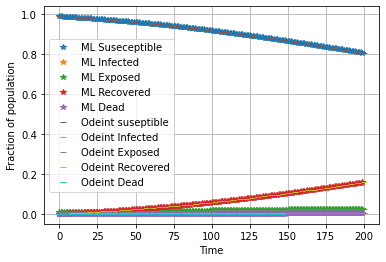

In [170]:
plt.plot(report_times,y3[:,0],'*',label= 'ML Suseceptible')
plt.plot(report_times,y3[:,1],'*',label= 'ML Infected ')
plt.plot(report_times,y3[:,2],'*',label= 'ML Exposed ')
plt.plot(report_times,y3[:,3],'*',label= 'ML Recovered ')
plt.plot(report_times,y3[:,4],'*',label= 'ML Dead ')
plt.plot(t_odein,odeint[:,0],'_',label= 'Odeint suseptible')
plt.plot(t_odein,odeint[:,1],'_',label= 'Odeint Infected ')
plt.plot(t_odein,odeint[:,2],'_',label= 'Odeint Exposed')
plt.plot(t_odein,odeint[:,3],'_',label= 'Odeint Recovered')
plt.plot(t_odein,odeint[:,4],'_',label= 'Odeint Dead')

#plt.plot(t_report,y_report,label='Report_times solver ')
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.grid()
plt.legend(loc='best')

## part 3

* Combine curve_fit with your custom ODE-solver to find optimal $\beta$-values for the SI-model - choose one of the same locations that you used in Exercise 2. 


In [182]:
# We use location=Norway
y_initial=[0.99,0.01]
covid19_df = extract_corona_data('Norway',data_file='./data/corona_data.dat')
t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
confirmed_Cases = covid19_df['CONFIRMED'].values

t_max=200
# Discard all data points after t=t_max
include_time = (t_data <= t_max)
t_data = t_data[include_time]
confirmed_Cases = confirmed_Cases[include_time]
    
N = confirmed_Cases[-1]
i0 = 1.0/N
s0= 1.0 - I0
y0=[s0,i0]
report_times=np.array(range(0,201))

#def SI_model2(y,t,beta):
#    s,i = y
#    return np.array([-beta*s*i,beta*s*i])

def dummie_SI(t,beta):
    result_SI= my_odeint(SI_model,y0,report_times,beta=beta)
    return result_SI[:,1]


beta, beta_y_value = curve_fit(dummie_SI, t_data, confirmed_Cases/N,p0=0.01)
beta


<ipython-input-168-a4229b3d6b78>:36: RuntimeWarning: divide by zero encountered in double_scalars
  dt = 0.9*DT*(EPS/eps)**(1/(p+1)) # could also multiply with 0.9 to be conservative


array([0.19391332])

- Verify that you get the same results as in that exercise.

In [176]:
print(chr(946),"(Norway)=",bisection(fun=df_SSR, min_x=0, max_x=1, location="Norway",print_log= False, plot= False))
print('beta-value for Norway using curve fit is:',beta)


beta-value for Norway using curve fit is: [0.19391332]


## Part 4.

Combine curve_fit with your custom ODE-solver to find optimal param- eter values for the SEIRD-model. Use the same location as in part 3.

In [191]:
y_seir=[0.99,0,0.01,0,0]
covid19_df = extract_corona_data('Norway',data_file='./data/corona_data.dat')
t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
confirmed_Cases = covid19_df['CONFIRMED'].values
death_cases= covid19_df['DEATHS'].values
recovered_cases= covid19_df['RECOVERED'].values


t_max=200
# Discard all data points after t=t_max
include_time = (t_data <= t_max)
t_data = t_data[include_time]
confirmed_Cases = confirmed_Cases[include_time]
death_cases=death_cases[include_time]
recovered_cases=recovered_cases[include_time]
c_t= confirmed_Cases + death_cases+recovered_cases


    
N = confirmed_Cases[-1]
i0 = 1.0/N
s0= 1.0 - I0
e0=0
r0=0
d0=0
y0=[s0,e0,i0,r0,d0]
report_times=np.array(range(0,201))

def dummie_SEIR(t,beta):
    result_seir= my_odeint(SEIR_model,y0,report_times,beta=beta)
    return result_seir[:,2]+result_seir[:,3]+result_seir[:,4]


beta_seird, beta_y = curve_fit(dummie_SEIR, t_data, c_t/N,p0=0.01)

print('beta-value for SEIRD model is',beta_seird)

beta-value for SEIRD model is [0.5374536]


How does the β-value change compared to the SI-model?

Answer: From curve fit function we see that the β-value for SEIRD-model increases compared to SI-model. This is because the cumulative number of cases of COVID-19 at time t C(t) has has more paramteres than the SI-model

## Part 5.

In reality, diseases never spread at a constant rate, especially not when the disease is deadly and people and governments starts to take action. However, these actions are very hard to model. As a simple extension to the SI-model, we instead assume that the Covid-infection rate declines exponentially:  
$$\beta (t)=\beta_0 e^{-\lambda t}\tag{9}$$  
The analytical solution has a the same form as before; we simply have to modify 
equations (6) and (7) by making the following replacement:  
$$\beta t\to \int_0^t\beta_0e^{-\lambda t}dt=\frac{\beta_0}{\lambda}(1-e^{-\lambda t})\tag{10}$$  

In [70]:
def SSR_new(beta,lamb_da, location, t_max=200, data_file='./data/corona_data.dat'):

    covid19_df = extract_corona_data(location,data_file)
    t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
    confirmed_Cases = covid19_df['CONFIRMED'].values
    
    # Discard all data points after t=t_max
    include_time = (t_data <= t_max)
    t_data = t_data[include_time]
    confirmed_Cases = confirmed_Cases[include_time]

    N = confirmed_Cases[-1]
    I0 =confirmed_Cases[0]/N
    S0 = 1.0 - I0
    bt = (beta/lamb_da)*(1.0 - np.exp(-lamb_da*t_data)) if lamb_da > 0 else beta*t_data

    m_i = 1.0 / (1.0 + (S0/I0)*np.exp(-bt))
    return np.sum((confirmed_Cases/N-m_i)**2)

In [71]:
def df_SSR_new(beta,lamb_da ,location, t_max=200, data_file='./data/corona_data.dat'):
    
    covid19_df = extract_corona_data(location,data_file)
    t_data = covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].values
    confirmed_Cases = covid19_df['CONFIRMED'].values
    
    # Discard all data points after t=t_max
    include_time = (t_data <= t_max)
    t_data = t_data[include_time]
    confirmed_Cases = confirmed_Cases[include_time]

    N = confirmed_Cases[-1]
    I0 = confirmed_Cases[0]/N
    S0 = 1.0 - I0
    bt = (beta/lamb_da)*(1.0 - np.exp(-lamb_da*t_data)) if lamb_da > 0 else beta*t_data

    m_i = 1/(1+((S0/I0)*np.exp(-bt)))
    
    df_m_i= S0/I0*t_data*np.exp(-bt)/(1+(S0/I0)*np.exp(-bt))**2
    return -2*np.sum((confirmed_Cases/N-m_i)*df_m_i)

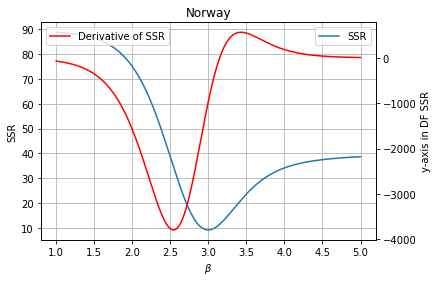

In [72]:
# lambda=0.3
beta_array = np.linspace(1, 5, 500)
SSR_array = [SSR_new(beta,0.3, 'Norway') for beta in beta_array]
df_SSR_array = [df_SSR_new(beta,0.3,'Norway') for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'Norway')

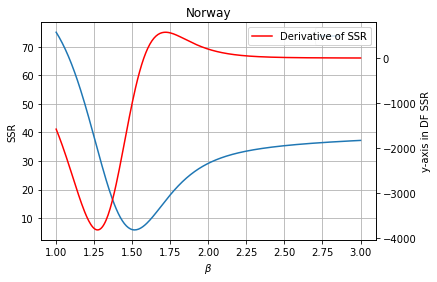

In [73]:
# Norway lambda=0.15
beta_array = np.linspace(1, 3, 300)
SSR_array = [SSR_new(beta,0.15, 'Norway') for beta in beta_array]
df_SSR_array = [df_SSR_new(beta,0.15,'Norway') for beta in beta_array]
plot_SSR_dfSSR(beta_array,SSR_array,df_SSR_array,'Norway')

> The $\beta_0$-value raises when $\lambda$ becomes greater. $\beta_0>\beta$

Assume that a high $\lambda$ implies a strong governmental response. Do your
estimated $\lambda$-values match your expectations?

In [76]:
def analytical_SI_new(beta,lamb_da, S0, I0, t):
    # Calculate s(t):fraction of the total population and i(t):fraction of infected people 
    bt = (beta/lamb_da)*(1.0 - np.exp(-lamb_da*t)) if lamb_da > 0 else beta*t
    i_t = 1/(1+((S0/I0)*np.exp(-bt)))
    s_t= ((S0/I0)*np.exp(-bt))/(1+((S0/I0)*np.exp(-bt)))
    return i_t,s_t

In [77]:
def plot_confirmed_cases_new(beta,lamb_da,location, data_file='./data/corona_data.dat'):
    covid19_df = extract_corona_data(location, data_file)
    N = covid19_df['CONFIRMED'].iloc[-1]
    # getting corona data
    time= covid19_df['ELAPSED_TIME_SINCE_OUTBREAK'].iloc[0:100]
    confirmed=covid19_df['CONFIRMED'].iloc[0:100]
    i_t,s_t = analytical_SI_new(beta,lamb_da,N-1, covid19_df['CONFIRMED'].iloc[0], time)
    # Make plot
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_xlabel('Time since initial outbreak (days)')
    ax.set_ylabel('The number of confirmed cases')
    ax.scatter(time, i_t*N, color='red')
    ax = fig.axes[0]
    ax.plot(time, confirmed)
    ax.legend(['Experminetal Data','Analytical'])
    return fig

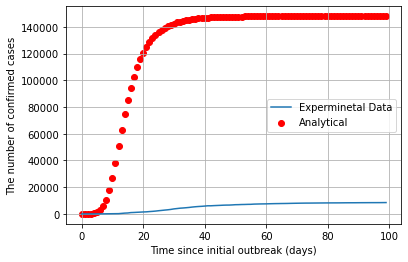

In [78]:
# lambda=0.15
Confrimed_caes_Norway=plot_confirmed_cases_new(2,0.15,'Norway')

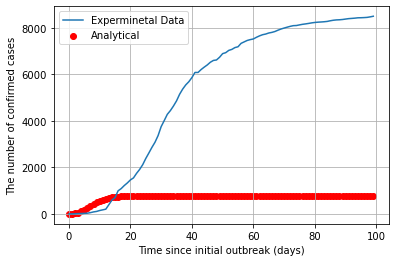

In [79]:
# lambda=0.3
Confrimed_caes_Norway=plot_confirmed_cases_new(2,0.3,'Norway')

# Conclusion and Discussion  

# Self-Reflections  
**Armin Sabri**: This project taught  me how to import data and visualizing it using pandas and matplotlib libraries, also I learnt how to implement different finding-roots methods in python, I could see how accurate they could be and how useful they are for my professional life, where collecting data and interpreting it is a every-day work. I learnt how to built functions-solvers to find parameters that help us to find the right model that fits the data given. Also we deliberated a lot with our classmates about the different solutions that the exercises could have and these discussions guide us to finish successfully our project. 

**Reynel Villabona**: This project taught me how to implement different methods of optimization in order to find roots and derivates of empirical functions. Also I learnt about odeint function which was unknown for me before. I think this project was much more demanding that project number 2, we had a lot of difficulties along the porject but we were able to make it with Professors and TAs help, which confirm how useful are the laboratories sessions that we have on wednesdays.

 

# References